In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

In [18]:
# Carregando o conjunto de dados
df = pd.read_csv('wine-clustering.csv')

df.describe()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [19]:
# Selecionando os atributos para plotagem
x_axis = df['Malic_Acid']
y_axis = df['Proline']
z_axis = df['Alcohol']  



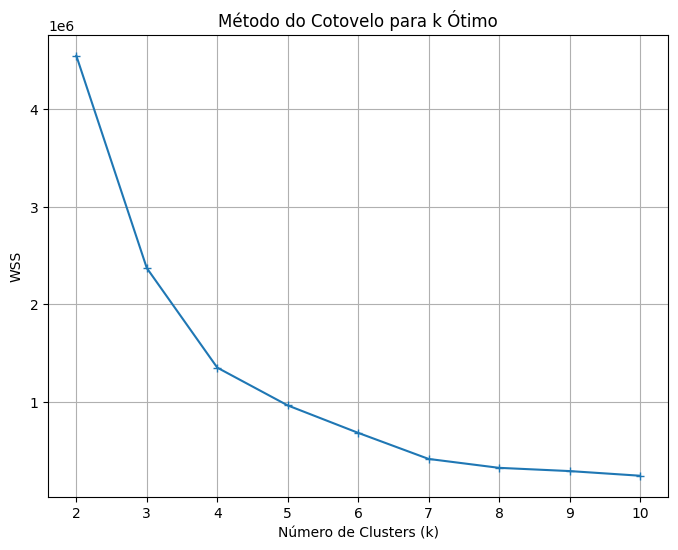

In [20]:
# Método do Cotovelo para encontrar o número ótimo de clusters
K = range(2, 11)
wss = []
for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=200)
    kmeans = kmeans.fit(df)
    wss.append(kmeans.inertia_)

meus_centros = pd.DataFrame({'Clusters': K, 'WSS': wss})

plt.figure(figsize=(8, 6))
plt.plot(meus_centros['Clusters'], meus_centros['WSS'], marker="+")
plt.title('Método do Cotovelo para k Ótimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WSS')
plt.grid(True)
plt.show()

In [21]:
# Calcular Silhouette Score para diferentes valores de k
SK = range(3, 13)
sil_score = []
for i in SK:
    labels = KMeans(n_clusters=i, init="k-means++", random_state=200).fit(df).labels_
    score = metrics.silhouette_score(df, labels, metric="euclidean", sample_size=1000, random_state=200)
    sil_score.append(score)
    print("Silhouette score para k (clusters) =", i, "é", score)

Silhouette score para k (clusters) = 3 é 0.5711381937868838
Silhouette score para k (clusters) = 4 é 0.566947772359962
Silhouette score para k (clusters) = 5 é 0.5047578949506587
Silhouette score para k (clusters) = 6 é 0.515210096308003
Silhouette score para k (clusters) = 7 é 0.5562199831144717
Silhouette score para k (clusters) = 8 é 0.5486213604076121
Silhouette score para k (clusters) = 9 é 0.5303955321561995
Silhouette score para k (clusters) = 10 é 0.5151354807527148
Silhouette score para k (clusters) = 11 é 0.5152797674635605
Silhouette score para k (clusters) = 12 é 0.5112734287496162


In [22]:
# Encontrar o número ótimo de clusters com base no Silhouette Score
optimal_k = SK[np.argmax(sil_score)]
print("Número ótimo de clusters com base no Silhouette Score:", optimal_k)


Número ótimo de clusters com base no Silhouette Score: 3


In [23]:
# Realizar clustering KMeans com k ótimo
kmeans_optimal = KMeans(n_clusters=optimal_k, init="k-means++", random_state=200)
kmeans_optimal.fit(df[['Malic_Acid', 'Proline', 'Alcohol']])
df['Clusters'] = kmeans_optimal.labels_

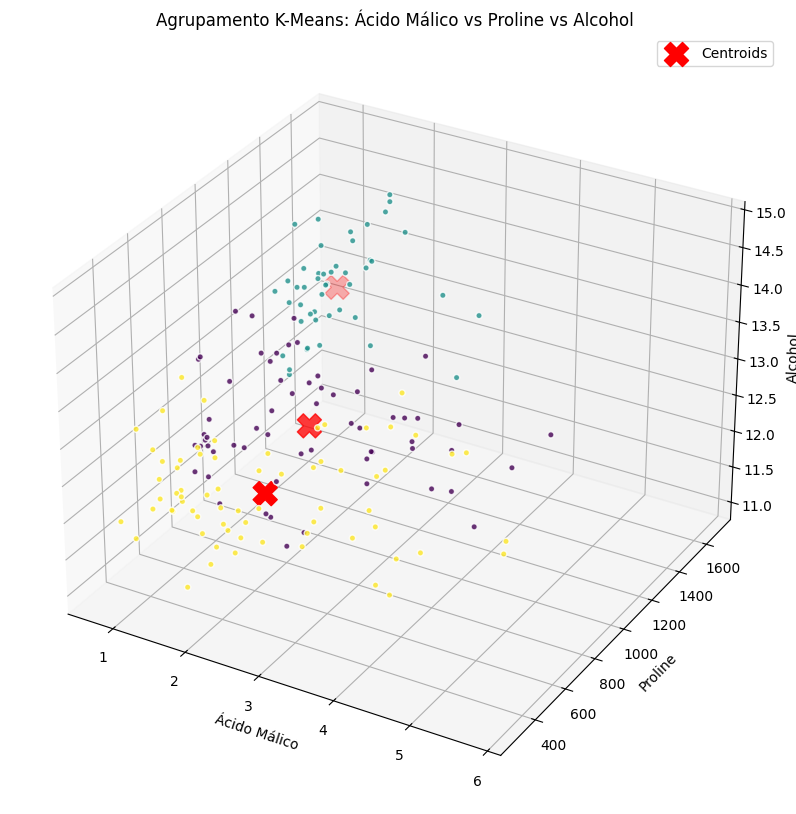

In [24]:
# Plotando o gráfico 3D de dispersão com os clusters coloridos
fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_axis, y_axis, z_axis, c=df['Clusters'], cmap='viridis', alpha=0.8, edgecolors='w')
ax.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], kmeans_optimal.cluster_centers_[:, 2], s=300, c='red', marker='X', label='Centroids')
ax.set_title('Agrupamento K-Means: Ácido Málico vs Proline vs Alcohol')
ax.set_xlabel('Ácido Málico')
ax.set_ylabel('Proline')
ax.set_zlabel('Alcohol')
ax.legend()
plt.show()
